<a href="https://colab.research.google.com/github/techosystem/DTree_RandomForest/blob/main/IDS_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## performance evaluation of machine learning to detect intrusion in the network traffic data

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

In [ ]:
print (data.shape)
data.head()

(170366, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             170366 non-null  int64  
 1    Flow Duration                170366 non-null  int64  
 2    Total Fwd Packets            170366 non-null  int64  
 3    Total Backward Packets       170366 non-null  int64  
 4   Total Length of Fwd Packets   170366 non-null  int64  
 5    Total Length of Bwd Packets  170366 non-null  int64  
 6    Fwd Packet Length Max        170366 non-null  int64  
 7    Fwd Packet Length Min        170366 non-null  int64  
 8    Fwd Packet Length Mean       170366 non-null  float64
 9    Fwd Packet Length Std        170366 non-null  float64
 10  Bwd Packet Length Max         170366 non-null  int64  
 11   Bwd Packet Length Min        170366 non-null  int64  
 12   Bwd Packet Length Mean       170366 non-nul

In [ ]:
data[' Label'].value_counts() # count the values of the target variable

BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name:  Label, dtype: int64

In [ ]:
data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170366.000000,1.703660e+05,170366.000000,170366.000000,1.703660e+05,1.703660e+05,170366.000000,170366.000000,170366.000000,170366.000000,...,170366.000000,170366.000000,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05
mean,7897.090599,1.246354e+07,15.124620,18.022276,5.569859e+02,3.183147e+04,167.775982,22.697786,48.233250,47.235628,...,11.925108,25.584506,7.433804e+04,4.676038e+04,1.646422e+05,5.012699e+04,3.690478e+06,1.310724e+05,3.784764e+06,3.543232e+06
std,18235.489428,3.193852e+07,1123.107756,1494.492871,7.710431e+03,3.460816e+06,461.299214,37.990783,94.947821,141.927429,...,1077.898793,6.354041,6.182048e+05,3.689605e+05,9.958673e+05,5.606797e+05,1.298830e+07,1.733767e+06,1.325135e+07,1.284183e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,7.882314,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.141200e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.169818e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


#### Tarnsform the target column from string to numbers using labelencoder from sklearn

In [ ]:
le = preprocessing.LabelEncoder()
data['Label'] = le.fit_transform(data[' Label'])
data.drop(' Label', axis = 1, inplace = True)
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,0
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,0
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,0
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


#### Subset the dataframe into input and target variables

In [ ]:
X = data.drop('Label', axis = 1)
y = data['Label']

#### Split the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

#### Removing the infinity and NaN values

In [ ]:
if np.any(np.isinf(X_train)) or np.any(np.isnan(X_train)):
    print("Data contains infinite or NaN values")

Data contains infinite or NaN values


In [ ]:
from sklearn.impute import SimpleImputer
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # use the mean to fill the inf and nan values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


#### Transform the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training with Support Vector Machine

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, svm_pred)

0.9872823322246136

In [ ]:
print(classification_report(y_test, svm_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50442
           1       0.88      0.05      0.09       459
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       202

    accuracy                           0.99     51110
   macro avg       0.47      0.26      0.27     51110
weighted avg       0.98      0.99      0.98     51110



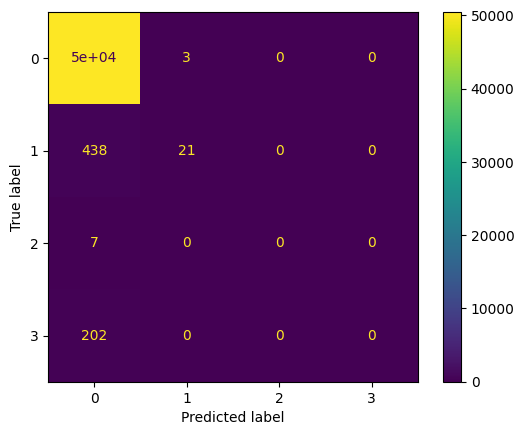

In [ ]:
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, svm_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(confusion_matrix(y_test, svm_pred))

[[50439     3     0     0]
 [  438    21     0     0]
 [    7     0     0     0]
 [  202     0     0     0]]


#### Implement the Random RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

#### Evaluation of Random Forest

In [ ]:
accuracy_score(y_test, rf_pred)

0.9957738211700254

In [ ]:
print(classification_report(y_test, rf_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50442
           1       0.76      0.83      0.79       459
           2       1.00      0.43      0.60         7
           3       0.49      0.33      0.39       202

    accuracy                           1.00     51110
   macro avg       0.81      0.65      0.70     51110
weighted avg       1.00      1.00      1.00     51110



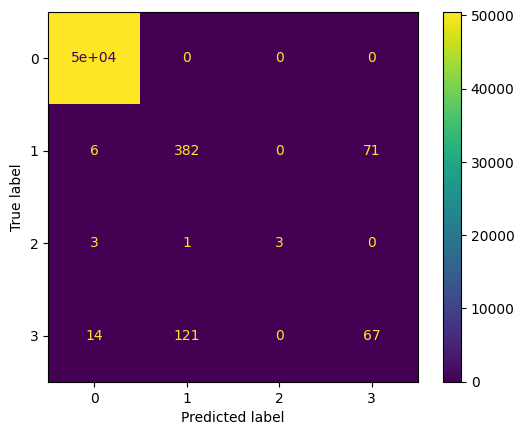

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred, labels=rf_clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()
plt.show()

In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[50442     0     0     0]
 [    6   382     0    71]
 [    3     1     3     0]
 [   14   121     0    67]]


#### Implementing XGBoost

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

#### Evaluation of XGBoost

In [ ]:
accuracy_score(y_test, xgb_pred)

0.9960281745255332

In [ ]:
print(classification_report(y_test, xgb_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50442
           1       0.76      0.84      0.80       459
           2       1.00      0.57      0.73         7
           3       0.51      0.37      0.43       202

    accuracy                           1.00     51110
   macro avg       0.82      0.70      0.74     51110
weighted avg       1.00      1.00      1.00     51110



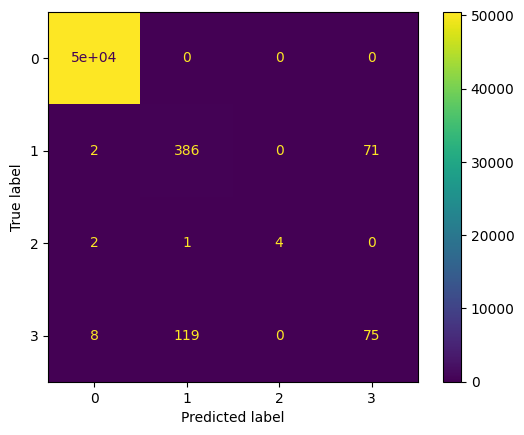

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_pred, labels=xgb_clf.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_clf.classes_)
disp_xgb.plot()
plt.show()

In [ ]:
print(confusion_matrix(y_test, xgb_pred))

[[50442     0     0     0]
 [    2   386     0    71]
 [    2     1     4     0]
 [    8   119     0    75]]
